# Import data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"dataset\CollegePlacement.csv")

# EDA

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [6]:
data.shape

(10000, 10)

In [7]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


# Data Cleaning

In [8]:
data.drop(columns=["College_ID"], inplace=True)

In [9]:
cgpa_above_10 = data[data["CGPA"] > 10].shape[0]
print("Number of students with CGPA more than 10:", cgpa_above_10)

Number of students with CGPA more than 10: 249


In [10]:
data.drop(data[data["CGPA"] > 10].index, inplace=True)

In [11]:
data.shape

(9751, 9)

In [12]:
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [13]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [14]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000
mean,99.479438,7.476841,7.465179,5.546200,4.967798,5.563737,2.509896
std,15.069030,1.417550,1.426456,2.870628,3.161108,2.900506,1.715773
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.250000,6.260000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.500000,7.490000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.700000,8.690000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000


In [15]:
X=data.drop(columns=['Placement'])
y=data.Placement

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visual Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def student_placed_count():
    sns.countplot(x=y_train)
    plt.show()

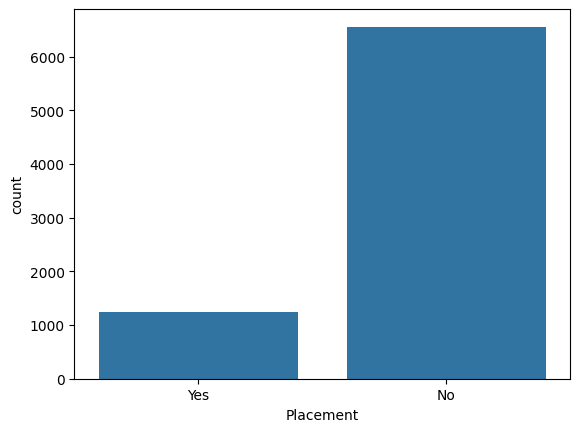

In [19]:
student_placed_count()

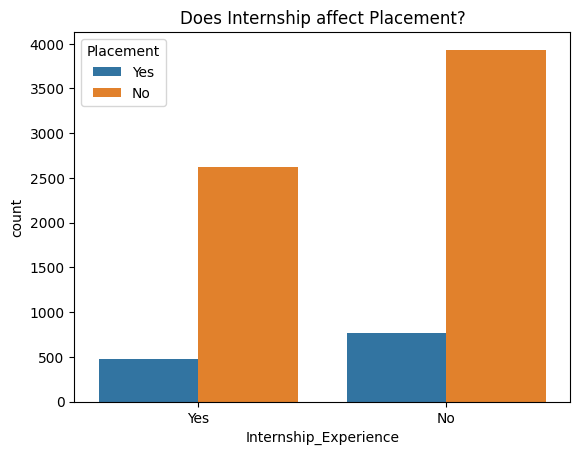

In [20]:
def internship_vs_placement():
    train_combined = pd.concat([X_train[['Internship_Experience']], y_train], axis=1)
    sns.countplot(x="Internship_Experience", hue="Placement", data=train_combined)
    plt.title("Does Internship affect Placement?")
    plt.show()
internship_vs_placement()

The above graph doesn't indicate that an internship is necessary for a placement.

In [21]:
def iq_vs_placement():
    bins = [20, 40, 60, 80, 90, 100, 120, 140, 160]
    train_combined = pd.concat([X_train[['IQ']], y_train], axis=1)
    sns.histplot(data=train_combined, x='IQ', hue='Placement', bins=20, kde=True, edgecolor='black')
    plt.title("IQ vs Placement")
    plt.xlabel("IQ Level")
    plt.ylabel("Placement Count")
    plt.show()

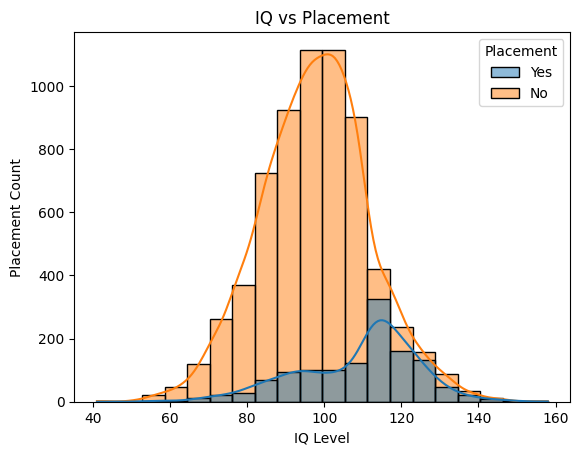

In [22]:
iq_vs_placement()

The histogram shows a **Normal Distribution** curve.

The above histogram shows that the **placed students** generally have an **IQ of 110-120**.

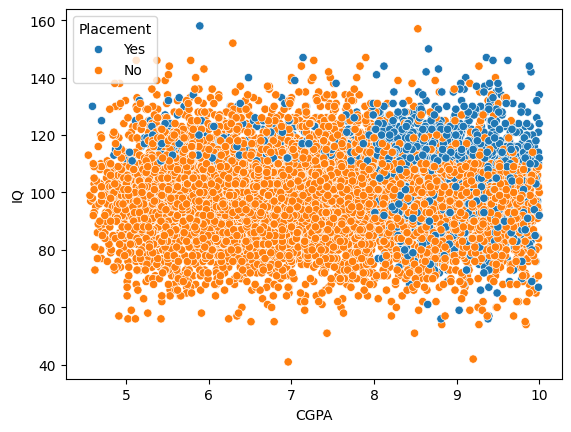

In [23]:
def cgpa_vs_placement():
    train_combined = pd.concat([X_train[['CGPA','IQ']], y_train], axis=1)
    sns.scatterplot(data=train_combined, x='CGPA', y='IQ', hue='Placement')

cgpa_vs_placement()

The above scatter plot clearly shows that the students with **higher CGPA** and **higher IQ** are placed easily.

In [24]:
#drop the outliers
train_combined = pd.concat([X_train, y_train], axis=1)
train_combined.drop(train_combined[(train_combined['CGPA'] < 6) &
                    (train_combined['Placement'] == 'Yes')].index, inplace=True)
X_train = train_combined.drop(columns=['Placement'])
y_train = train_combined['Placement']

In [25]:
y_train=pd.Series(y_train, name="Placement", index=X_train.index)

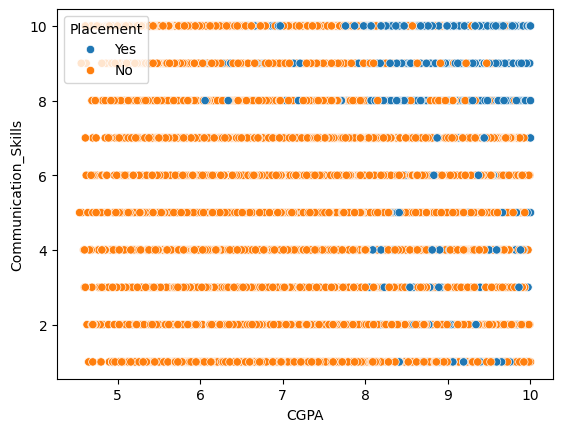

In [26]:
def commskills_vs_placement():
    train_combined = pd.concat([X_train[['Communication_Skills','CGPA']],
                                y_train], axis=1)
    sns.scatterplot(data=train_combined, x='CGPA', y='Communication_Skills', hue='Placement')

commskills_vs_placement()

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
X_train["Internship_Experience"] = le.fit_transform(X_train["Internship_Experience"])
y_train = le.fit_transform(y_train)

In [28]:
y_test = le.fit_transform(y_test)

In [29]:
X_train.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
7964,91,9.22,8.84,9,1,9,8,3
4914,80,5.53,5.23,8,0,1,6,5
4754,91,6.48,6.30,4,0,1,10,0
8806,86,7.76,7.44,10,1,9,1,2
8998,89,9.71,9.72,1,0,5,7,5


In [30]:
y_train=pd.Series(y_train, name="Placement", index=X_train.index)

In [31]:
y_train.head()

7964    1
4914    0
4754    0
8806    0
8998    0
Name: Placement, dtype: int64

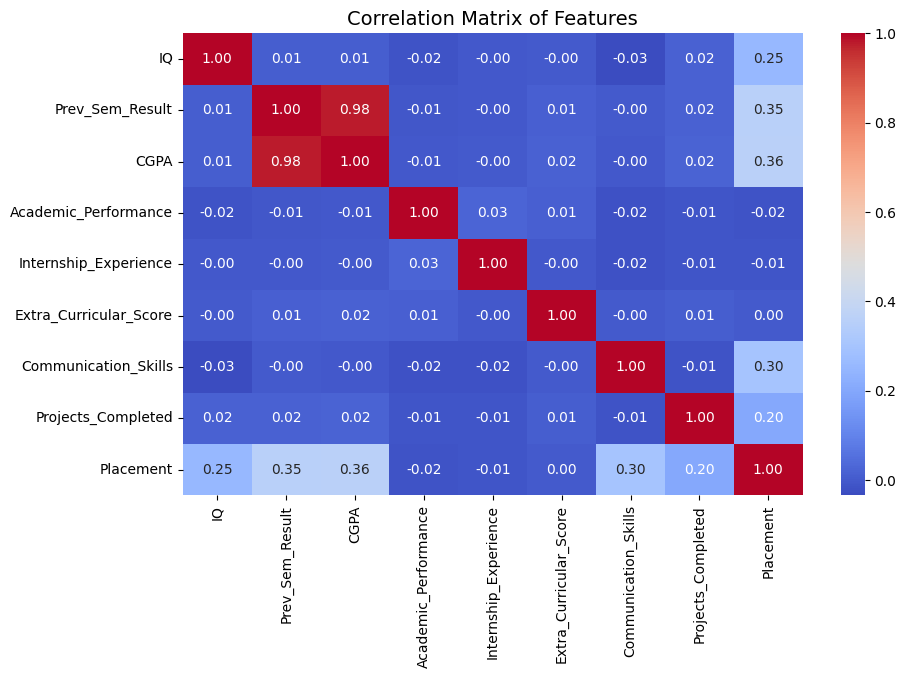

In [32]:
plt.figure(figsize=(10,6))
train_combined = pd.concat([X_train,
                            y_train], axis=1)
corr = train_combined.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features", fontsize=14)
plt.show()

# Model Training

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

In [34]:
pipeline.fit(X_train[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']], y_train)

,steps,"[('scaler', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [35]:
y_pred = pipeline.predict(X_test[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8903126601742696

Confusion Matrix:
 [[1557   64]
 [ 150  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1621
           1       0.74      0.55      0.63       330

    accuracy                           0.89      1951
   macro avg       0.82      0.75      0.78      1951
weighted avg       0.88      0.89      0.88      1951



In [36]:
from sklearn.linear_model import SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(random_state=42))
])
pipeline.fit(X_train[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']], y_train)

,steps,"[('scaler', ...), ('sgd_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


In [37]:
y_pred = pipeline.predict(X_test[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8882624295233214

Confusion Matrix:
 [[1529   92]
 [ 126  204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1621
           1       0.69      0.62      0.65       330

    accuracy                           0.89      1951
   macro avg       0.81      0.78      0.79      1951
weighted avg       0.88      0.89      0.89      1951



In [38]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(probability=True))
])
pipeline.fit(X_train[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']], y_train)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [39]:
y_pred = pipeline.predict(X_test[['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills']])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9236289082521784

Confusion Matrix:
 [[1531   90]
 [  59  271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1621
           1       0.75      0.82      0.78       330

    accuracy                           0.92      1951
   macro avg       0.86      0.88      0.87      1951
weighted avg       0.93      0.92      0.92      1951



Out of **Logistic Regression, SGDClassifier, SVM**

SVM attains the best score of 92% accuracy.

In [40]:
import joblib
joblib.dump(pipeline, "SVM.pkl")

['SVM.pkl']

In [41]:
import pickle

with open("SVM.pkl", "wb") as f:
    pickle.dump(pipeline, f)